In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [5]:
dataset= pd.read_csv("D:\IIT B\Sem 3\GNR 627\Course Project\Data Set\Final_Dataset_Used_Bikes.csv")

In [6]:
df= pd.DataFrame(dataset)
df

,bike_name,price,city,kms_driven,owner,age,power,brand,sales_success
0,TVS Star City Plus Dual Tone 110cc,35000,Ahmedabad,17654,First Owner,3,110,TVS,1
1,Royal Enfield Classic 350cc,119900,Delhi,11000,First Owner,4,350,Royal Enfield,0
2,Triumph Daytona 675R,600000,Delhi,110,First Owner,8,675,Triumph,0
3,TVS Apache RTR 180cc,65000,Bangalore,16329,First Owner,4,180,TVS,0
4,Yamaha FZ S V 2.0 150cc-Ltd. Edition,80000,Bangalore,10000,First Owner,3,150,Yamaha,0
...,...,...,...,...,...,...,...,...,...
32643,Hero Passion Pro 100cc,39000,Delhi,22000,First Owner,4,100,Hero,1
32644,TVS Apache RTR 180cc,30000,Karnal,6639,First Owner,9,180,TVS,1
32645,Bajaj Avenger Street 220,60000,Delhi,20373,First Owner,6,220,Bajaj,1
32646,Hero Super Splendor 125cc,15600,Jaipur,84186,First Owner,16,125,Hero,0


In [7]:
Data_prac= df

In [8]:
#One hot encoding Owner variable

one_hot_encoded = pd.get_dummies(df['owner'])
df = pd.concat([df, one_hot_encoded], axis=1)

df.drop('owner', axis=1, inplace=True) 

In [9]:
#One hot encoding Owner variable

one_hot_encoded = pd.get_dummies(df['age'])
df = pd.concat([df, one_hot_encoded], axis=1)

df.drop('age', axis=1, inplace=True) 

In [10]:
#One hot encoding brand variable

one_hot_encoded = pd.get_dummies(df['brand'])
df = pd.concat([df, one_hot_encoded], axis=1)

df.drop('brand', axis=1,inplace=True)

In [11]:
bike_name_column= df['bike_name']
city_name_column= df['city']

In [12]:
df.drop('bike_name', axis=1, inplace=True)
df.drop('city',axis=1, inplace=True)
df.drop('sales_success',axis=1, inplace=True)

In [13]:
df.head()

,price,kms_driven,power,First Owner,Fourth Owner Or More,Second Owner,Third Owner,1,2,3,...,LML,MV,Mahindra,Rajdoot,Royal Enfield,Suzuki,TVS,Triumph,Yamaha,Yezdi
0,35000,17654,110,1,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
1,119900,11000,350,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,600000,110,675,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,65000,16329,180,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,80000,10000,150,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0


C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: F

For k=2, WCSS: 106532064412191.55
For k=3, WCSS: 64653415226431.34
For k=4, WCSS: 40996403540439.21
For k=5, WCSS: 30376793137246.844
For k=6, WCSS: 23780617196005.254
For k=7, WCSS: 18837754903389.582
For k=8, WCSS: 15305191262732.469
For k=9, WCSS: 12739907564734.809
For k=10, WCSS: 10618089509479.719
For k=11, WCSS: 9530648902461.45
For k=12, WCSS: 8464192670557.358
For k=13, WCSS: 7701940839504.926
For k=14, WCSS: 6932727680998.465
For k=15, WCSS: 6282175730182.115
For k=16, WCSS: 5761389567218.524
For k=17, WCSS: 5206358988351.584


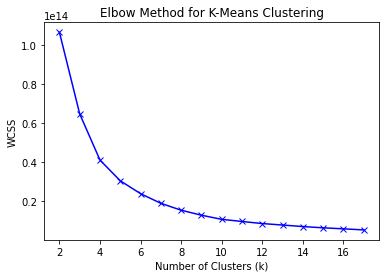

In [14]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Assuming 'data' contains your features

k_values = range(2,18)

# Calculate WCSS for different values of k
wcss = []
for k in k_values:  # Trying k from 2 to 12 clusters
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)  # inertia_ gives the WCSS

# Display the calculated WCSS for each k
for i, w in enumerate(wcss, start=2):  # Start from 2 since k starts from 2
    print(f"For k={i}, WCSS: {w}")

# Plot the elbow curve
plt.plot(k_values, wcss, 'bx-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')  # Within-Cluster Sum of Squares
plt.title('Elbow Method for K-Means Clustering')
plt.show()



In [15]:
import pandas as pd
from sklearn.cluster import KMeans

# Assuming 'data' contains your features

# Optimal number of clusters
optimal_k = 6  # Change this to your optimal number of clusters

# Initialize KMeans with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_k)

# Fit KMeans to your data
kmeans.fit(df)

# Get cluster labels for each data point
cluster_labels = kmeans.labels_

# Add cluster labels as a new column to the dataset
df['Cluster'] = cluster_labels


C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [16]:
Data_prac['Cluster']= df['Cluster']

In [17]:
Data_prac.head(5)

,bike_name,price,city,kms_driven,owner,age,power,brand,sales_success,Cluster
0,TVS Star City Plus Dual Tone 110cc,35000,Ahmedabad,17654,First Owner,3,110,TVS,1,4
1,Royal Enfield Classic 350cc,119900,Delhi,11000,First Owner,4,350,Royal Enfield,0,0
2,Triumph Daytona 675R,600000,Delhi,110,First Owner,8,675,Triumph,0,1
3,TVS Apache RTR 180cc,65000,Bangalore,16329,First Owner,4,180,TVS,0,0
4,Yamaha FZ S V 2.0 150cc-Ltd. Edition,80000,Bangalore,10000,First Owner,3,150,Yamaha,0,0
